# **Crime Forecasting using ARIMA model**

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.7MB/s 
     |████████████████████████████████| 2.1MB 40.6MB/s 
     |████████████████████████████████| 9.5MB 47.7MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Import Dataset**

In [4]:
!wget https://www.dropbox.com/s/s5f8dnrcaxij2py/data.csv?dl=0

--2021-03-30 02:36:08--  https://www.dropbox.com/s/s5f8dnrcaxij2py/data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s5f8dnrcaxij2py/data.csv [following]
--2021-03-30 02:36:08--  https://www.dropbox.com/s/raw/s5f8dnrcaxij2py/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdafd3b279944593821a191fcb5.dl.dropboxusercontent.com/cd/0/inline/BLrAwcsR-hBOIEPM7ZCmlTqFzhqXCPxiQ_v0mY2ZPQsnMsgyXMIQSGoe5NziITcoIoAmqiPUdzkENVAJUHNtwEjxZLUoAdbXrwlwR6Jo5LUFuVlUwfs6C69OMw8ZrVxqvezvfTrkL0uWs0Gve-9eqpbl/file# [following]
--2021-03-30 02:36:08--  https://ucdafd3b279944593821a191fcb5.dl.dropboxusercontent.com/cd/0/inline/BLrAwcsR-hBOIEPM7ZCmlTqFzhqXCPxiQ_v0mY2ZPQsnMsgyXMIQSGoe5NziITcoIoAmqiPUdzkENVAJUHNtwEjxZLUoAdbXr

In [5]:
crime_data = pd.read_csv('data.csv?dl=0')

In [6]:
crime_data.drop(['(Source)'],axis=1,inplace=True)

# **Data Preprocessing**

In [7]:
crime_data = crime_data.dropna()
crime_data[crime_data.duplicated(keep=False)]
crime_data = crime_data.reset_index(drop = True)
crime_data

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,HY416556,09/09/2010 08:10:00 PM,074XX S MARYLAND AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,323,6.0,11,1183191.0,1855830.0,2010,41.759594,-87.604169,"(41.759593809, -87.604169095)"
1,HY431076,01/15/2010 12:01:00 AM,044XX S OAKLEY AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,924,12.0,02,1161779.0,1875003.0,2010,41.812678,-87.682112,"(41.812678317, -87.682111569)"
2,HS594517,11/01/2010 10:35:00 AM,029XX W WILCOX ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,SIDEWALK,True,False,1124,2.0,18,1156795.0,1899213.0,2010,41.879216,-87.699738,"(41.87921551, -87.699737903)"
3,HY435598,06/01/2010 12:00:00 PM,005XX N MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,False,False,1834,42.0,11,1177342.0,1903838.0,2010,41.891466,-87.624153,"(41.891465732, -87.624153044)"
4,HS587770,10/28/2010 07:21:53 PM,008XX N AVERS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,False,1112,27.0,18,1150571.0,1905280.0,2010,41.895988,-87.722433,"(41.895987813, -87.722432928)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687185,JD448774,12/10/2018 12:01:00 AM,107XX S RIDGEWAY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,2211,19.0,17,1153258.0,1833037.0,2018,41.697690,-87.714474,"(41.697689632, -87.714474258)"
2687186,JB555242,12/16/2018 02:10:00 AM,041XX W 30TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,1031,22.0,04A,1149311.0,1884390.0,2018,41.838688,-87.727602,"(41.838687711, -87.727602064)"
2687187,JB269440,05/18/2018 11:34:00 PM,071XX S EUCLID AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,333,5.0,01A,1190280.0,1857899.0,2018,41.765103,-87.578122,"(41.765103492, -87.578121854)"
2687188,JB456068,09/29/2018 12:00:00 PM,042XX N MAJOR AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1624,38.0,05,1137586.0,1927566.0,2018,41.957387,-87.769587,"(41.957386868, -87.769586624)"


In [8]:
crime_data.columns = crime_data.columns.str.strip()
crime_data.columns = crime_data.columns.str.replace(',', '')
crime_data.columns = crime_data.columns.str.replace(' ', '_')
crime_data.columns = crime_data.columns.str.lower()

In [9]:
crime_data['date'] = pd.to_datetime(crime_data['date']).dt.date
crime_data

,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,ward,fbi_code,x_coordinate,y_coordinate,year,latitude,longitude,location
0,HY416556,2010-09-09,074XX S MARYLAND AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,323,6.0,11,1183191.0,1855830.0,2010,41.759594,-87.604169,"(41.759593809, -87.604169095)"
1,HY431076,2010-01-15,044XX S OAKLEY AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,924,12.0,02,1161779.0,1875003.0,2010,41.812678,-87.682112,"(41.812678317, -87.682111569)"
2,HS594517,2010-11-01,029XX W WILCOX ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,SIDEWALK,True,False,1124,2.0,18,1156795.0,1899213.0,2010,41.879216,-87.699738,"(41.87921551, -87.699737903)"
3,HY435598,2010-06-01,005XX N MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,False,False,1834,42.0,11,1177342.0,1903838.0,2010,41.891466,-87.624153,"(41.891465732, -87.624153044)"
4,HS587770,2010-10-28,008XX N AVERS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,False,1112,27.0,18,1150571.0,1905280.0,2010,41.895988,-87.722433,"(41.895987813, -87.722432928)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687185,JD448774,2018-12-10,107XX S RIDGEWAY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,2211,19.0,17,1153258.0,1833037.0,2018,41.697690,-87.714474,"(41.697689632, -87.714474258)"
2687186,JB555242,2018-12-16,041XX W 30TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,1031,22.0,04A,1149311.0,1884390.0,2018,41.838688,-87.727602,"(41.838687711, -87.727602064)"
2687187,JB269440,2018-05-18,071XX S EUCLID AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,333,5.0,01A,1190280.0,1857899.0,2018,41.765103,-87.578122,"(41.765103492, -87.578121854)"
2687188,JB456068,2018-09-29,042XX N MAJOR AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1624,38.0,05,1137586.0,1927566.0,2018,41.957387,-87.769587,"(41.957386868, -87.769586624)"


In [10]:
crime_data = crime_data.drop(['case_number','block','iucr','description','beat','ward','fbi_code','x_coordinate','y_coordinate','latitude','longitude'],axis=1)

In [11]:
crime_data = crime_data.reset_index(drop = True)
crime_data

,date,primary_type,location_description,arrest,domestic,year,location
0,2010-09-09,DECEPTIVE PRACTICE,RESIDENCE,False,False,2010,"(41.759593809, -87.604169095)"
1,2010-01-15,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,False,2010,"(41.812678317, -87.682111569)"
2,2010-11-01,NARCOTICS,SIDEWALK,True,False,2010,"(41.87921551, -87.699737903)"
3,2010-06-01,DECEPTIVE PRACTICE,SMALL RETAIL STORE,False,False,2010,"(41.891465732, -87.624153044)"
4,2010-10-28,NARCOTICS,APARTMENT,True,False,2010,"(41.895987813, -87.722432928)"
...,...,...,...,...,...,...,...
2687185,2018-12-10,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,2018,"(41.697689632, -87.714474258)"
2687186,2018-12-16,ASSAULT,STREET,False,False,2018,"(41.838687711, -87.727602064)"
2687187,2018-05-18,HOMICIDE,STREET,True,False,2018,"(41.765103492, -87.578121854)"
2687188,2018-09-29,BURGLARY,RESIDENCE,True,False,2018,"(41.957386868, -87.769586624)"


In [12]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT', 
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT', 
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE', 
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE', 
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE', 
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE', 
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE', 
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE' 
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crime_data['crime_type'] = crime_data.primary_type.map(primary_type_mapping)

In [13]:
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER' 
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crime_data['location_type'] = crime_data.location_description.map(loc_mapping)

In [14]:
crime_data

,date,primary_type,location_description,arrest,domestic,year,location,crime_type,location_type
0,2010-09-09,DECEPTIVE PRACTICE,RESIDENCE,False,False,2010,"(41.759593809, -87.604169095)",CRIMINAL_OFFENSE,RESIDENCE
1,2010-01-15,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,False,2010,"(41.812678317, -87.682111569)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2,2010-11-01,NARCOTICS,SIDEWALK,True,False,2010,"(41.87921551, -87.699737903)",NARCOTIC_OFFENSE,PUBLIC_AREA
3,2010-06-01,DECEPTIVE PRACTICE,SMALL RETAIL STORE,False,False,2010,"(41.891465732, -87.624153044)",CRIMINAL_OFFENSE,BUSINESS
4,2010-10-28,NARCOTICS,APARTMENT,True,False,2010,"(41.895987813, -87.722432928)",NARCOTIC_OFFENSE,RESIDENCE
...,...,...,...,...,...,...,...,...,...
2687185,2018-12-10,OFFENSE INVOLVING CHILDREN,RESIDENCE,True,True,2018,"(41.697689632, -87.714474258)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2687186,2018-12-16,ASSAULT,STREET,False,False,2018,"(41.838687711, -87.727602064)",NON-CRIMINAL_ASSAULT,PUBLIC_AREA
2687187,2018-05-18,HOMICIDE,STREET,True,False,2018,"(41.765103492, -87.578121854)",CRIMINAL_OFFENSE,PUBLIC_AREA
2687188,2018-09-29,BURGLARY,RESIDENCE,True,False,2018,"(41.957386868, -87.769586624)",THEFT,RESIDENCE


In [15]:
crime_data = crime_data.drop(['primary_type','location_description'],axis=1)

In [16]:
crime_data = crime_data.dropna()
crime_data[crime_data.duplicated(keep=False)]
crime_data = crime_data.reset_index(drop = True)

In [17]:
crime_data

,date,arrest,domestic,year,location,crime_type,location_type
0,2010-09-09,False,False,2010,"(41.759593809, -87.604169095)",CRIMINAL_OFFENSE,RESIDENCE
1,2010-01-15,True,False,2010,"(41.812678317, -87.682111569)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2,2010-11-01,True,False,2010,"(41.87921551, -87.699737903)",NARCOTIC_OFFENSE,PUBLIC_AREA
3,2010-06-01,False,False,2010,"(41.891465732, -87.624153044)",CRIMINAL_OFFENSE,BUSINESS
4,2010-10-28,True,False,2010,"(41.895987813, -87.722432928)",NARCOTIC_OFFENSE,RESIDENCE
...,...,...,...,...,...,...,...
2685660,2018-06-28,False,False,2018,"(41.972101049, -87.654899332)",NON-CRIMINAL_ASSAULT,RESIDENCE
2685661,2018-12-10,True,True,2018,"(41.697689632, -87.714474258)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2685662,2018-12-16,False,False,2018,"(41.838687711, -87.727602064)",NON-CRIMINAL_ASSAULT,PUBLIC_AREA
2685663,2018-05-18,True,False,2018,"(41.765103492, -87.578121854)",CRIMINAL_OFFENSE,PUBLIC_AREA


# **1. Arrests - Forecast and Analysis**

In [18]:
crime_data1 = crime_data.groupby('arrest')
df1 = crime_data1.get_group(True)
df1

,date,arrest,domestic,year,location,crime_type,location_type
1,2010-01-15,True,False,2010,"(41.812678317, -87.682111569)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2,2010-11-01,True,False,2010,"(41.87921551, -87.699737903)",NARCOTIC_OFFENSE,PUBLIC_AREA
4,2010-10-28,True,False,2010,"(41.895987813, -87.722432928)",NARCOTIC_OFFENSE,RESIDENCE
5,2010-07-19,True,False,2010,"(41.881098841, -87.692951526)",NARCOTIC_OFFENSE,PUBLIC_AREA
6,2010-04-23,True,False,2010,"(41.786245702, -87.654669662)",NARCOTIC_OFFENSE,RESIDENCE
...,...,...,...,...,...,...,...
2685657,2018-11-27,True,False,2018,"(41.695982095, -87.596653142)",THEFT,BUSINESS
2685659,2018-09-10,True,False,2018,"(41.753600332, -87.562149651)",THEFT,RESIDENCE
2685661,2018-12-10,True,True,2018,"(41.697689632, -87.714474258)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2685663,2018-05-18,True,False,2018,"(41.765103492, -87.578121854)",CRIMINAL_OFFENSE,PUBLIC_AREA


In [19]:
df1 = df1.drop(['domestic','year','location','crime_type','location_type'],axis=1)

In [20]:
df1 = df1.groupby("date", as_index = False).count()

In [21]:
df1.set_index('date',inplace=True)

In [22]:
df1

,arrest
date,
2010-01-01,338
2010-01-02,232
2010-01-03,214
2010-01-04,225
2010-01-05,311
...,...
2018-12-27,115
2018-12-28,172
2018-12-29,151


In [23]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df1)


(0.01, False)

In [24]:
train = df1[:2786]
test = df1[-501:]

In [25]:
arima_model1 =  auto_arima(train,start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=19.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=28362.749, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=27345.128, Time=6.81 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=26665.918, Time=13.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=28361.213, Time=0.12 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=28029.760, Time=1.35 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=16.95 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=34.79 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=27362.919, Time=11.57 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=59.10 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=27168.675, Time=4.00 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=19.78 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=9.49 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=29.79 sec
 ARIMA(0,0,1)(0,1,1)[12]             : 

In [27]:
prediction = pd.DataFrame(arima_model1.predict(n_periods = len(test)),index=test.index)
prediction.columns = ['predicted_arrests']
prediction

,predicted_arrests
date,
2017-08-18,147.318907
2017-08-19,155.093705
2017-08-20,152.551020
2017-08-21,150.630130
2017-08-22,145.597676
...,...
2018-12-27,118.940614
2018-12-28,118.816598
2018-12-29,122.528336


In [28]:
mean_absolute_error(test["arrest"], prediction)

20.734251768917304

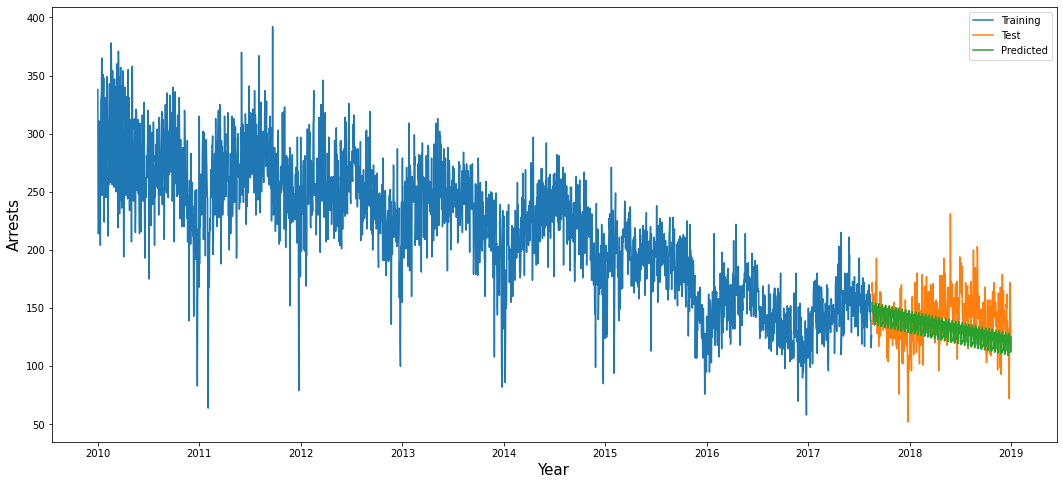

In [29]:
plt.figure(figsize=(18,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.ylabel('Arrests', size=15)
plt.xlabel('Year', size=15)
plt.legend(loc = 'Left corner')
plt.show()

# **2. Domestic - Forecast and Analysis**

In [18]:
crime_data2 = crime_data.groupby('domestic')
df2 = crime_data2.get_group(True)
df2

,date,arrest,domestic,year,location,crime_type,location_type
22,2010-01-07,False,True,2010,"(41.811645148, -87.641970166)",NON-CRIMINAL_ASSAULT,RESIDENCE
24,2010-08-15,True,True,2010,"(41.960027497, -87.720453904)",SEXUAL_OFFENSE,RESIDENCE
50,2010-01-01,False,True,2010,"(41.96503178, -87.768375694)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
52,2010-12-05,False,True,2010,"(41.983591797, -87.713773009)",SEXUAL_OFFENSE,RESIDENCE
55,2010-04-04,True,True,2010,"(41.782467577, -87.657125736)",SEXUAL_OFFENSE,RESIDENCE
...,...,...,...,...,...,...,...
2685648,2018-04-01,True,True,2018,"(41.7829949, -87.741219775)",NON-CRIMINAL_ASSAULT,RESIDENCE
2685649,2018-05-27,False,True,2018,"(41.814588508, -87.699311442)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2685655,2018-07-17,True,True,2018,"(41.81126767, -87.691850144)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE
2685658,2018-10-08,False,True,2018,"(41.700516252, -87.623332893)",HUMAN_TRAFFICKING_OFFENSE,RESIDENCE


In [19]:
df2 = df2.drop(['arrest','year','location','crime_type','location_type'],axis=1)

In [20]:
df2 = df2.groupby("date", as_index = False).count()

In [21]:
df2.set_index('date',inplace=True)

In [22]:
df2

,domestic
date,
2010-01-01,233
2010-01-02,121
2010-01-03,141
2010-01-04,119
2010-01-05,102
...,...
2018-12-27,94
2018-12-28,121
2018-12-29,119


In [23]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df2)

(0.01, False)

In [24]:
train = df2[:2786]
test = df2[-501:]

In [25]:
arima_model2 =  auto_arima(train,start_p = 1, start_q = 1,
                          max_p = 1, max_q = 1, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=15.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=26908.260, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=25941.187, Time=4.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.63 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=26906.261, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=26671.185, Time=0.76 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=25303.632, Time=13.73 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=38.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.09 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=25518.872, Time=9.27 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=25295.612, Time=19.69 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=25873.572, Time=5.93 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=59.17 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=24.90 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept

In [26]:
prediction = pd.DataFrame(arima_model2.predict(n_periods = len(test)),index=test.index)
prediction.columns = ['predicted_domestic']
prediction

,predicted_domestic
date,
2017-08-18,131.843118
2017-08-19,123.369015
2017-08-20,130.858948
2017-08-21,143.290661
2017-08-22,130.098707
...,...
2018-12-27,132.032522
2018-12-28,131.213883
2018-12-29,114.564540


In [27]:
mean_absolute_error(test["domestic"], prediction)

20.279980768003036

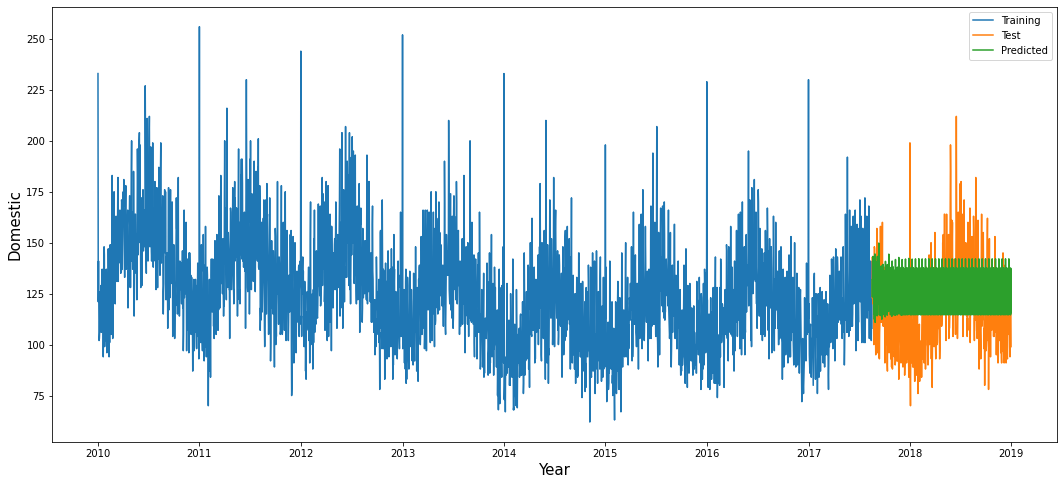

In [28]:
plt.figure(figsize=(18,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.ylabel('Domestic', size=15)
plt.xlabel('Year', size=15)
plt.legend(loc = 'Left corner')
plt.show()

# **3. Total Crime - Forecast and Analysis**

In [29]:
crime_type_map = {
    ('THEFT', 'NON-CRIMINAL_ASSAULT', 'SEXUAL_OFFENSE', 'WEAPONS_OFFENSE', 'CRIMINAL_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE', 'NARCOTIC_OFFENSE', 'OTHER_OFFENSE' ) : 'CRIME'
}
crime_type_mapping = {}
for keys, values in crime_type_map.items():
    for key in keys:
        crime_type_mapping[key] = values
crime_data['crimes'] = crime_data.crime_type.map(crime_type_mapping)

In [30]:
crime_data = crime_data.drop(['crime_type'],axis=1)

In [31]:
crime_data = crime_data.dropna()
crime_data[crime_data.duplicated(keep=False)]
crime_data = crime_data.reset_index(drop = True)

In [32]:
crime_data3 = crime_data.groupby('crimes')
df3 = crime_data3.get_group('CRIME')
df3

,date,arrest,domestic,year,location,location_type,crimes
0,2010-09-09,False,False,2010,"(41.759593809, -87.604169095)",RESIDENCE,CRIME
1,2010-01-15,True,False,2010,"(41.812678317, -87.682111569)",RESIDENCE,CRIME
2,2010-11-01,True,False,2010,"(41.87921551, -87.699737903)",PUBLIC_AREA,CRIME
3,2010-06-01,False,False,2010,"(41.891465732, -87.624153044)",BUSINESS,CRIME
4,2010-10-28,True,False,2010,"(41.895987813, -87.722432928)",RESIDENCE,CRIME
...,...,...,...,...,...,...,...
2685660,2018-06-28,False,False,2018,"(41.972101049, -87.654899332)",RESIDENCE,CRIME
2685661,2018-12-10,True,True,2018,"(41.697689632, -87.714474258)",RESIDENCE,CRIME
2685662,2018-12-16,False,False,2018,"(41.838687711, -87.727602064)",PUBLIC_AREA,CRIME
2685663,2018-05-18,True,False,2018,"(41.765103492, -87.578121854)",PUBLIC_AREA,CRIME


In [33]:
df3 = df3.drop(['arrest','domestic','year','location','location_type'],axis=1)

In [34]:
df3 = df3.groupby("date", as_index = False).count()

In [35]:
df3.set_index('date',inplace=True)

In [36]:
df3

,crimes
date,
2010-01-01,1355
2010-01-02,792
2010-01-03,759
2010-01-04,855
2010-01-05,910
...,...
2018-12-27,591
2018-12-28,694
2018-12-29,666


In [37]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df3)

(0.01, False)

In [38]:
train = df3[:2786]
test = df3[-501:]

In [39]:
arima_model3 =  auto_arima(train,start_p = 1, start_q = 1,
                          max_p = 1, max_q = 1, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)  

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=13.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=33827.386, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=32786.939, Time=5.80 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=32489.429, Time=6.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=33825.464, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=33567.482, Time=1.50 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=32487.085, Time=7.85 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=32849.906, Time=4.38 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=40.09 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=32486.602, Time=35.81 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=32486.649, Time=24.77 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=51.53 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=42.64 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=44.45 sec
 ARIMA(1,0,0)(1,1,2)[12] int

In [40]:
prediction = pd.DataFrame(arima_model3.predict(n_periods = len(test)),index=test.index)
prediction.columns = ['predicted_totalcrime']
prediction

,predicted_totalcrime
date,
2017-08-18,819.345846
2017-08-19,768.050472
2017-08-20,797.390612
2017-08-21,795.531173
2017-08-22,799.086420
...,...
2018-12-27,797.538967
2018-12-28,778.566053
2018-12-29,780.658153


In [41]:
mean_absolute_error(test["crimes"], prediction)

89.33179547288115

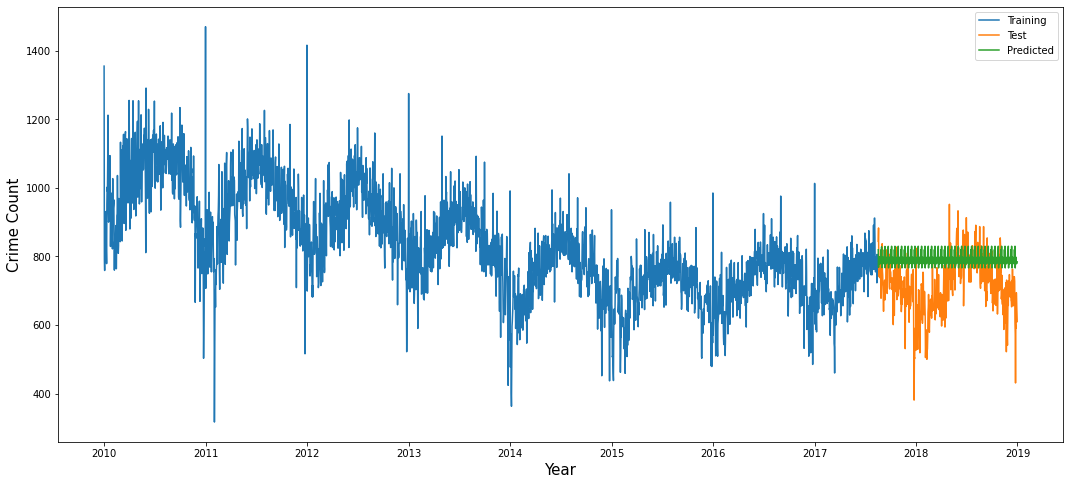

In [42]:
plt.figure(figsize=(18,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.ylabel('Crime Count', size=15)
plt.xlabel('Year', size=15)
plt.legend(loc = 'Left corner')
plt.show()